In [204]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.layers import Dropout
from keras import regularizers
from matplotlib import pyplot
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline
%pylab inline

df = pd.read_csv("resultados_final_01.csv")

df

Populating the interactive namespace from numpy and matplotlib


D:\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['matrix']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


,ctg_pronomes,ctg_absolutas,ctg_tristes,6sents_alegria,6sents_raiva,6sents_tristeza,6sents_desgosto,6sents_medo,6sents_surpresa,3sents_prob_positivo,3sents_prob_negativo,3sents_prob_neutro,3sents100_positivo,3sents010negativo,3sents001neutro,polaridade,isDepressivo
0,0.032000,0.032000,0.000000,9.519660e-01,2.023690e-03,0.001571,9.508921e-05,4.061718e-03,0.040282,0.073310,0.823175,1.035150e-01,2,33,3,22,1
1,0.033784,0.020270,0.006757,4.333018e-01,4.941406e-03,0.096504,1.870873e-02,4.932809e-03,0.441611,0.007082,0.869191,1.237270e-01,0,7,1,6,1
2,0.038462,0.057692,0.006410,2.110005e-03,2.000647e-03,0.008563,3.870964e-02,2.398130e-01,0.708804,0.071148,0.928852,5.816548e-08,1,7,0,-11,1
3,0.035714,0.035714,0.007143,2.133500e-02,3.948315e-03,0.742763,4.367151e-02,2.484595e-03,0.185797,0.027011,0.970172,2.816865e-03,1,32,0,-3,1
4,0.099291,0.042553,0.014184,9.855831e-06,3.162122e-06,0.008911,3.744462e-05,1.487351e-03,0.989551,0.037385,0.960193,2.422689e-03,0,10,0,0,1
5,0.085271,0.062016,0.015504,4.650953e-03,3.411338e-02,0.153682,4.284877e-03,3.572990e-03,0.799696,0.013429,0.940292,4.627947e-02,0,20,1,-8,1
6,0.091503,0.058824,0.013072,1.297371e-03,3.956857e-04,0.021072,1.471504e-04,1.046500e-03,0.976042,0.043554,0.878607,7.783890e-02,0,30,3,4,1
7,0.051282,0.057692,0.019231,6.686888e-02,2.840341e-02,0.168034,1.049538e-02,3.725247e-03,0.722474,0.091571,0.874359,3.406929e-02,4,47,0,1,1
8,0.110236,0.023622,0.007874,1.321288e-07,1.016680e-03,0.043706,1.841949e-06,1.165202e-06,0.955275,0.150507,0.772692,7.680145e-02,3,16,2,-5,1
9,0.167665,0.065868,0.023952,5.532839e-10,1.182279e-12,0.000006,1.119303e-14,3.785115e-15,0.999994,0.158897,0.775794,6.530908e-02,7,35,3,-14,1


In [166]:
#verificando a dimensao do problema
df.shape

(220, 17)

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 17 columns):
ctg_pronomes             220 non-null float64
 ctg_absolutas           220 non-null float64
 ctg_tristes             220 non-null float64
 6sents_alegria          220 non-null float64
 6sents_raiva            220 non-null float64
 6sents_tristeza         220 non-null float64
 6sents_desgosto         220 non-null float64
 6sents_medo             220 non-null float64
 6sents_surpresa         220 non-null float64
 3sents_prob_positivo    220 non-null float64
 3sents_prob_negativo    220 non-null float64
 3sents_prob_neutro      220 non-null float64
 3sents100_positivo      220 non-null int64
 3sents010negativo       220 non-null int64
 3sents001neutro         220 non-null int64
 polaridade              220 non-null int64
isDepressivo             220 non-null int64
dtypes: float64(12), int64(5)
memory usage: 29.3 KB


D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
D:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
D:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


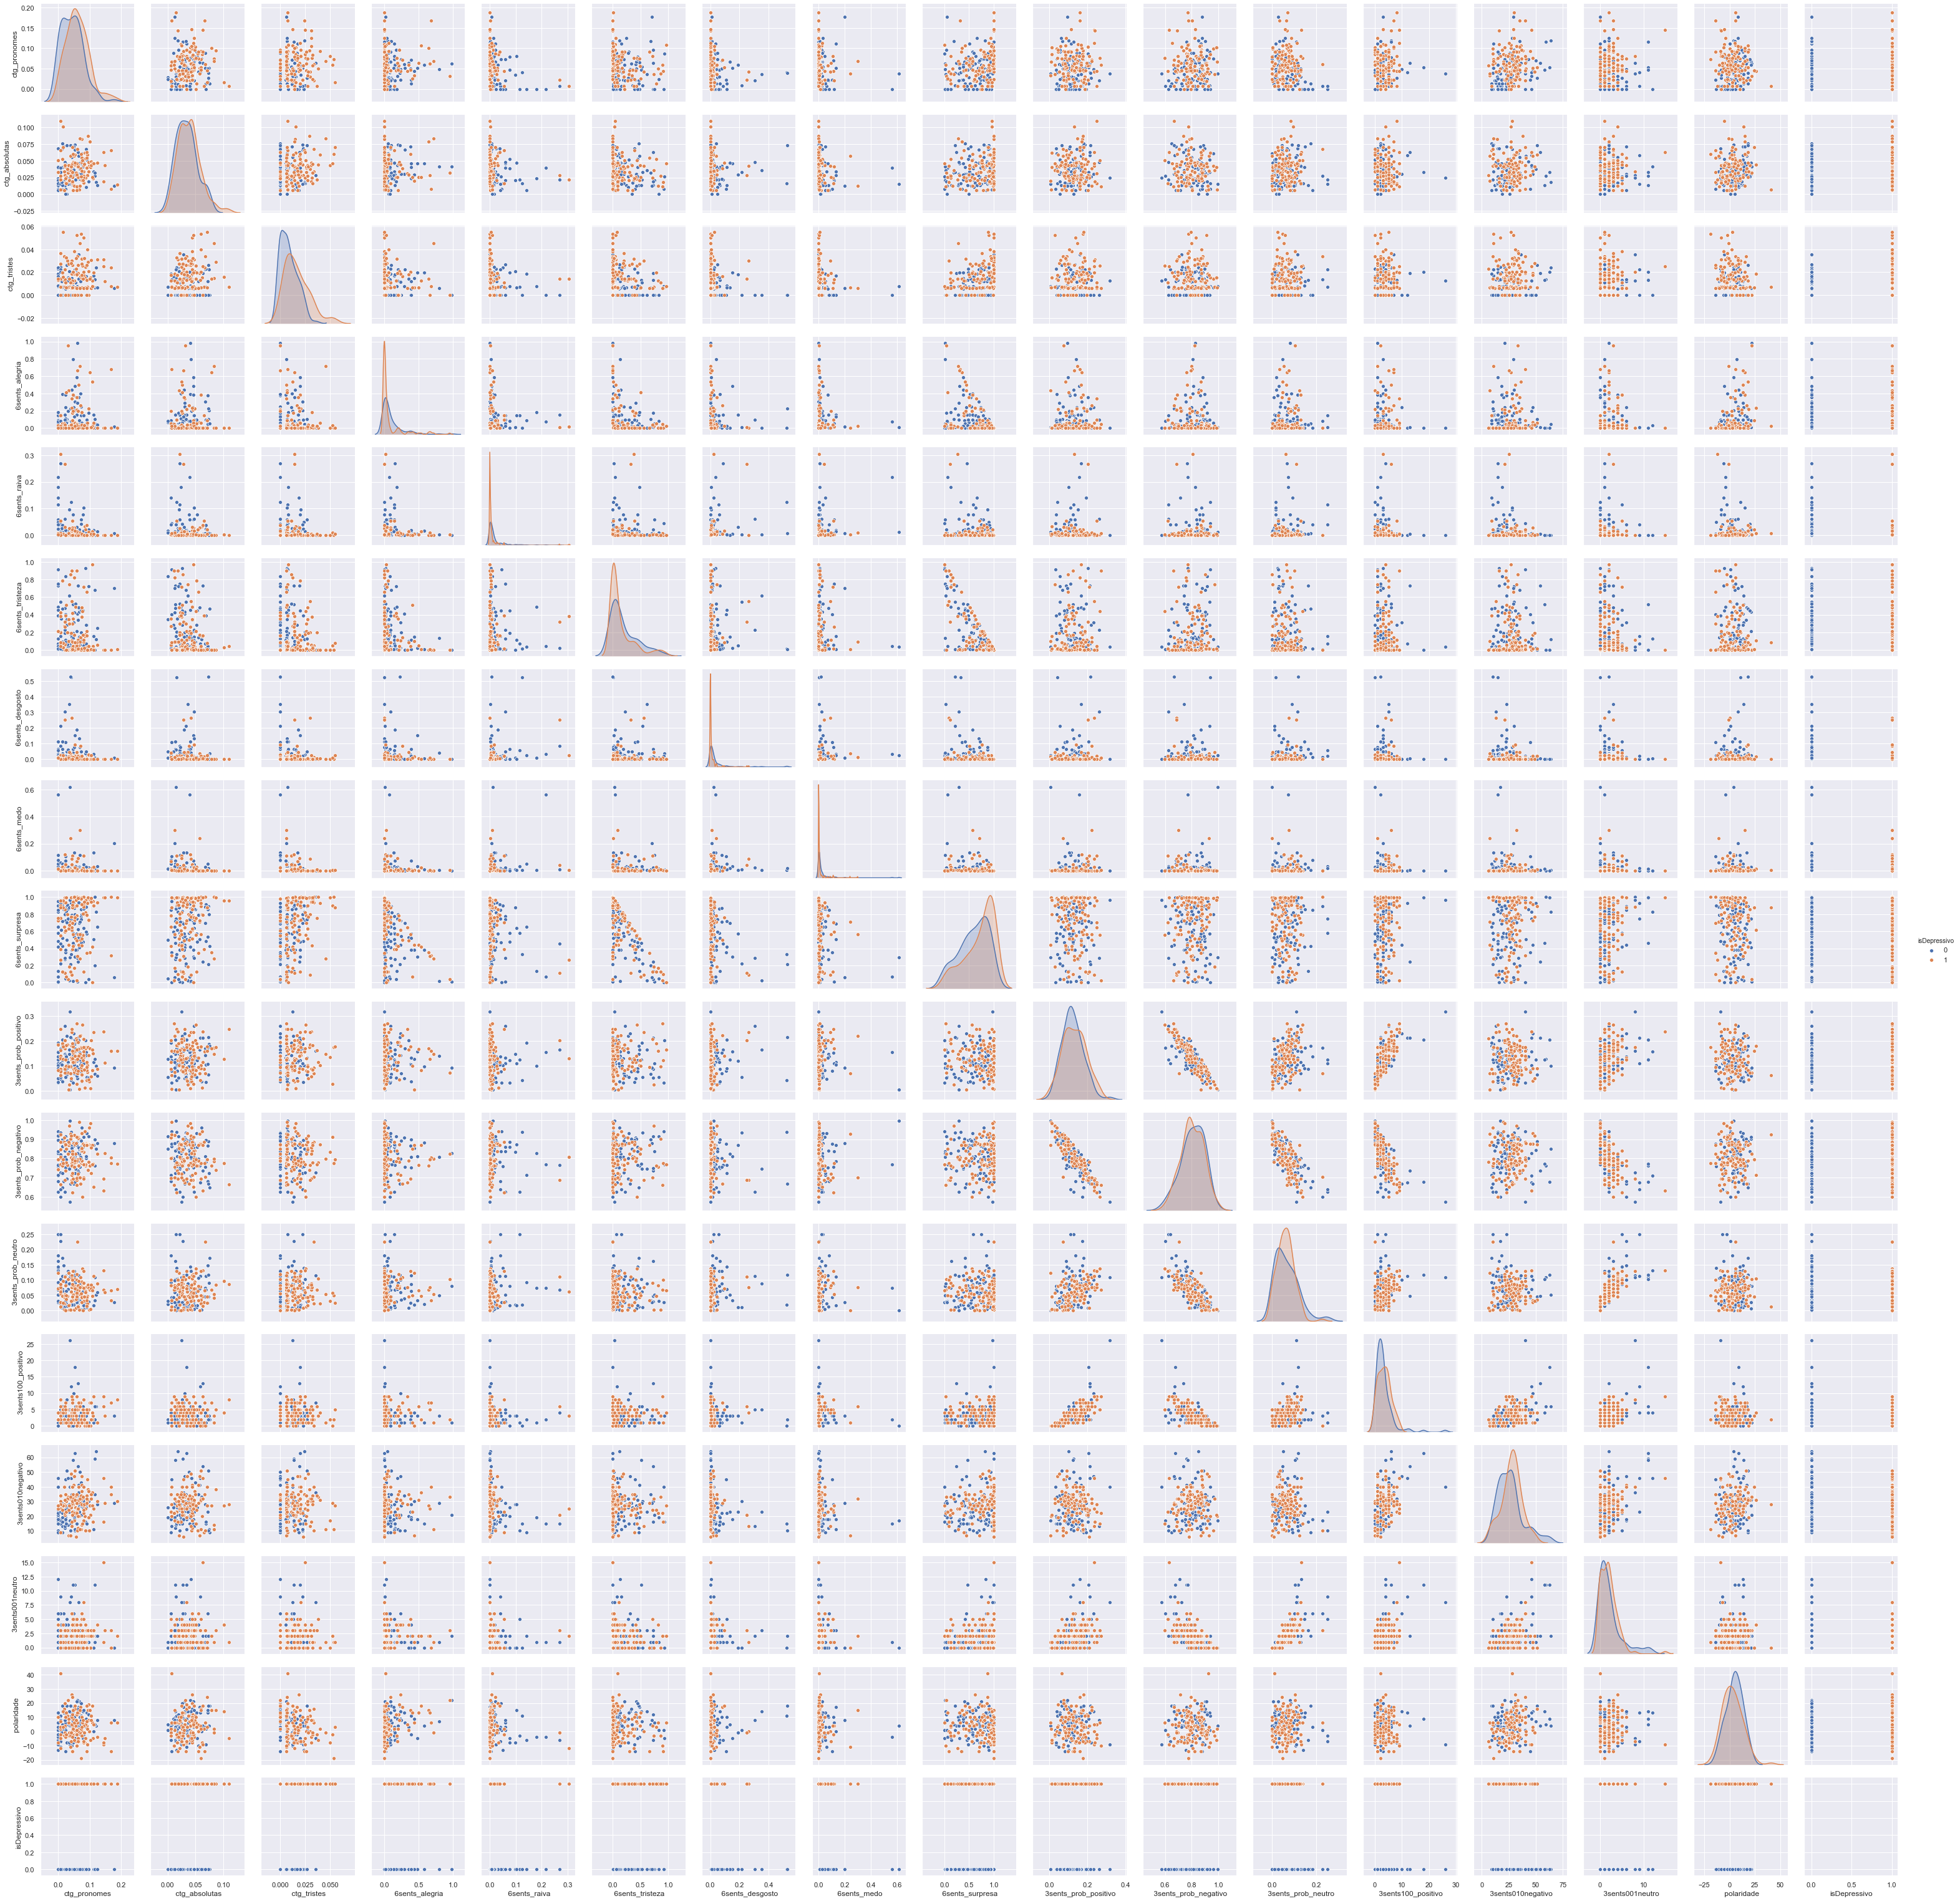

In [8]:
sns.pairplot(df, hue='isDepressivo')

In [205]:
dataset = df.values

# criação de recursos de entrada e variáveis de destino 
X = dataset[:, 0: 16] 
Y = dataset[:, 16]

In [206]:
# escala o conjunto de dados para que todos os recursos de entrada fiquem entre 0 e 1
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.16984615, 0.29226667, 0.        , ..., 0.46551724, 0.2       ,
        0.68333333],
       [0.17931393, 0.18513514, 0.12258687, ..., 0.01724138, 0.06666667,
        0.41666667],
       [0.20414201, 0.52692308, 0.11630037, ..., 0.01724138, 0.        ,
        0.13333333],
       ...,
       [0.37030411, 0.2124031 , 0.        , ..., 0.37931034, 0.2       ,
        0.48333333],
       [0.46621622, 0.61711712, 0.        , ..., 0.37931034, 0.06666667,
        0.36666667],
       [0.9406037 , 0.11561181, 0.11482821, ..., 0.39655172, 0.        ,
        0.45      ]])

In [207]:
#divide a base em 2, sendo val_and_test 30% do conjunto geral dos dados
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, test_size=0.3, stratify = Y, random_state = 40)


In [208]:
uniqueTrain, countsTrain = numpy.unique(Y_train, return_counts=True)
dict(zip(uniqueTrain, countsTrain))

uniqueTest, countsTest = numpy.unique(Y_test, return_counts=True)
dict(zip(uniqueTest, countsTest))

#uniqueVal, countsVal = numpy.unique(Y_val, return_counts=True)
#dict(zip(uniqueVal, countsVal))

{0.0: 31, 1.0: 35}

In [209]:
print('Taxa de deptressão no treino', countsTrain[1]/len(Y_train))
print('Taxa de deptressão no teste', countsTest[1]/len(Y_test))
#print('Taxa de deptressão na validação', countsVal[1]/len(Y_val))

Taxa de deptressão no treino 0.525974025974026
Taxa de deptressão no teste 0.5303030303030303


In [216]:
'''
model_3 = Sequential()
model_3.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(16,)))
model_3.add(Dropout(0.2))
model_3.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_3.add(Dropout(0.2))
model_3.add(Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)))
'''
model_3 = Sequential()
model_3.add(Dense(16, activation='relu', input_shape=(16,)))
model_3.add(Dropout(0.2))
model_3.add(Dense(12, activation='relu'))
model_3.add(Dropout(0.2))
model_3.add(Dense(1, activation='sigmoid'))


In [217]:
model_3.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [218]:
hist_3=model_3.fit(X_train, Y_train,batch_size=10, epochs=150, verbose=1)

Epoch 1/150
154/154 [==============================] - 1s 9ms/step - loss: 0.7009 - acc: 0.4610
Epoch 2/150
154/154 [==============================] - 0s 227us/step - loss: 0.6941 - acc: 0.5065
Epoch 3/150
154/154 [==============================] - 0s 233us/step - loss: 0.6920 - acc: 0.5065
Epoch 4/150
154/154 [==============================] - 0s 207us/step - loss: 0.6872 - acc: 0.5779
Epoch 5/150
154/154 [==============================] - 0s 207us/step - loss: 0.6914 - acc: 0.5260
Epoch 6/150
154/154 [==============================] - 0s 201us/step - loss: 0.6875 - acc: 0.5584
Epoch 7/150
154/154 [==============================] - 0s 259us/step - loss: 0.6877 - acc: 0.5649
Epoch 8/150
154/154 [==============================] - 0s 259us/step - loss: 0.6848 - acc: 0.6494
Epoch 9/150
154/154 [==============================] - 0s 259us/step - loss: 0.6851 - acc: 0.5974
Epoch 10/150
154/154 [==============================] - 0s 272us/step - loss: 0.6827 - acc: 0.5779
Epoch 11/150
154/154 

In [219]:
# evaluate the model
_, train_acc = model_3.evaluate(X_train, Y_train, verbose=1)
_, test_acc = model_3.evaluate(X_test, Y_test, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

66/66 [==============================] - 0s 106us/step
Train: 0.864, Test: 0.742


KeyError: 'val_loss'

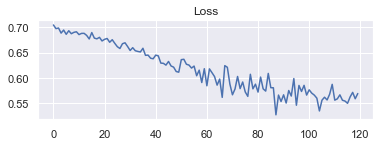

In [160]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(hist_3.history['loss'], label='train')
pyplot.plot(hist_3.history['val_loss'], label='test')
pyplot.legend()


KeyError: 'val_acc'

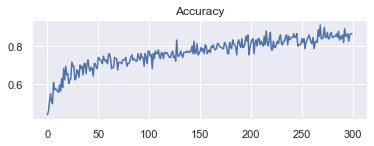

In [93]:
# plot accuracy during training

pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(hist_3.history['acc'], label='train')
pyplot.plot(hist_3.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()


In [220]:
y_pred_test = model_3.predict(X_test)

y_pred_test = (y_pred_test>0.5)
y_pred_test

array([[False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [

In [178]:
Y_test

array([0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0.,
       1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1.])

In [221]:
from sklearn.metrics import classification_report

target_names = ['Não depressão', 'depressão']
print(classification_report(Y_test, y_pred_test, target_names=target_names))

               precision    recall  f1-score   support

Não depressão       0.72      0.74      0.73        31
    depressão       0.76      0.74      0.75        35

    micro avg       0.74      0.74      0.74        66
    macro avg       0.74      0.74      0.74        66
 weighted avg       0.74      0.74      0.74        66



In [222]:
from sklearn.metrics import accuracy_score

print(accuracy_score(Y_test, y_pred_test))

0.7424242424242424


In [223]:
# predict probabilities for test set
yhat_probs = model_3.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model_3.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(Y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(Y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Y_test, yhat_classes)
print(matrix)

Accuracy: 0.742424
Precision: 0.764706
Recall: 0.742857
F1 score: 0.753623
Cohens kappa: 0.483901
ROC AUC: 0.790783
[[23  8]
 [ 9 26]]


In [224]:
import nltk
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

#print (pd.crosstab(matrix, rownames=['Real'], colnames=["Negatives", "Positives"], index=["Negatives", "Positives"], margins=True))

pd.DataFrame(matrix, columns=["Negatives", "Positives"],index=["Negatives", "Positives"])


,Negatives,Positives
Negatives,23,8
Positives,9,26


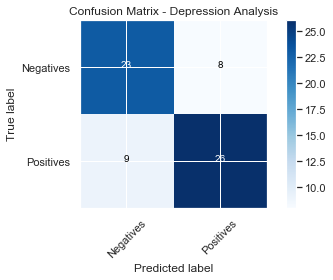

In [225]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix

import numpy as np
import itertools
import matplotlib.pyplot as plt
import pandas
import pandas as pd

classes = ["Negatives", "Positives"]

plt.figure()
plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Depression Analysis")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

text_format = 'd'
thresh = matrix.max() / 2.
for row, column in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
   plt.text(column, row, format(matrix[row, column], text_format),
           horizontalalignment="center",
           color="white" if matrix[row, column] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

plt.show()

In [99]:
# confusion matrix
confusion_matrix(Y_test,y_pred_test)

array([[20, 11],
       [11, 24]], dtype=int64)

In [1]:
#salva o modelo treinado
model_3.save('./model1_74.h5')

NameError: name 'model_3' is not defined

In [229]:
#salva o modelo treinado
model_3.save_weights('./model1.1_74.h5')